1. Plot the CTCS solution for different t values with FTCS at Δt

2. Overlay the realistic curve

3. Overlay the FTCS solution for all time steps

In [1]:
import numpy as np
import matplotlib.pyplot as plt

u=1, Δx=1, Δt=0.1

In [2]:
dx = 1  
dt = 0.1
u = 1  
ts = np.arange(0, 11, dt)  
xs = np.arange(-20, 20, dx)  

C = np.zeros((len(xs), len(ts)))
C_FTCS = np.zeros((len(xs), len(ts)))
C_real = np.zeros((len(xs), len(ts)))

C(0,0)=10; C(x,0)=0 elsewhere

In [3]:
for i in range(len(xs)):
    if xs[i] == 0:
        C[i, 0] = 10
        C_FTCS[i, 0] = 10
    else:
        C[i, 0] = 0
        C_FTCS[i, 0] = 0

In [4]:
for j in range(len(ts)):
    for i in range(len(xs)):
        if xs[i] == u * ts[j]:
            C_real[i, j] = 10
        else:
            C_real[i, j] = 0

In [5]:
for n in range(0, len(ts) - 1):
    for m in range(1, len(xs) - 1):
        C_FTCS[m, n + 1] = C_FTCS[m, n] - u * dt / (2 * dx) * (C_FTCS[m + 1, n] - C_FTCS[m - 1, n])

In [6]:
for m in range(1, len(xs) - 1):
    C[m, 1] = C[m, 0] - u * dt / (2 * dx) * (C[m + 1, 0] - C[m - 1, 0])

for n in range(1, len(ts) - 1):
    for m in range(1, len(xs) - 1):
        C[m, n + 1] = C[m, n - 1] - u * dt / dx * (C[m + 1, n] - C[m - 1, n])

Plot the time steps asked in the task.

Text(0.5, 0, 'X')

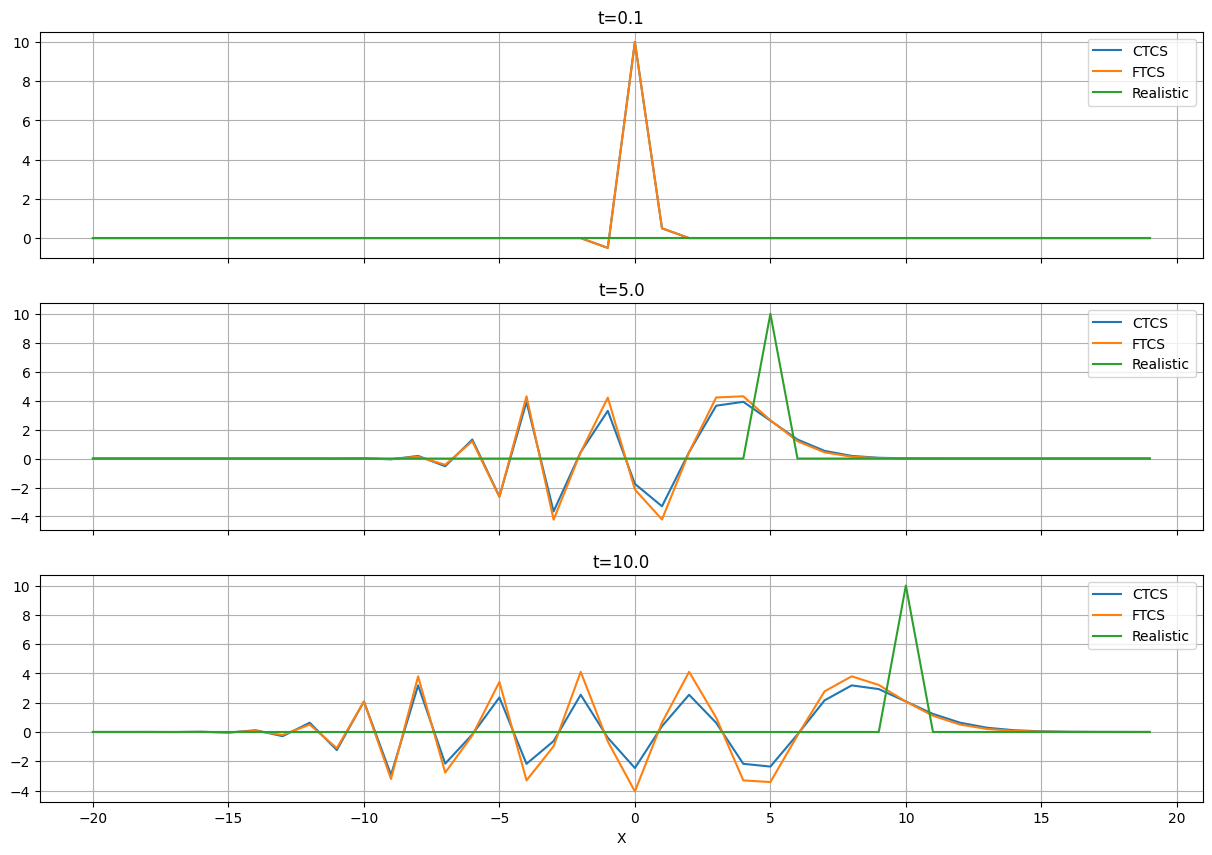

In [7]:
for i in range(len(ts)):
    if ts[i] ==0.1:
        t1 = i
    if ts[i] == 5:
        t2 = i
    if ts[i] == 10:
        t3 = i
tpoint = [t1, t2, t3]

fig, ax = plt.subplots(3, 1, figsize=(15,10),sharex=True)

for i in range(3):
    ax[i].set_title(r't=' + str(ts[tpoint[i]]))
    ax[i].plot(xs, C[:, tpoint[i]], label='CTCS')
    ax[i].plot(xs, C_FTCS[:, tpoint[i]], label='FTCS')
    ax[i].plot(xs, C_real[:, tpoint[i]], label='Realistic')
    ax[i].grid(True)
    ax[i].legend()
ax[2].set_xlabel('X')

At t=0.1, the realistic curve is a clean straight line, the FTCS and CTCS curve have small fluctuation and overlay each other. At t=5 and t=10, the realistic curve maintain its shape and value while moving at a constant speed, while the FTCS and CTCS curve fluctuate a lot and perform quite inaccurate.

1. Plot the realistic curves

2. Overlay the CTCS solutions 

3. Overlay the FTCS results

4. Overlay the FTUS results

5. Plot the figure for Δt=0.5 

Δx=0.2, Δt=0.1, u=1.

In [8]:
dx = 0.2 
dt = 0.1
u = 1  
tspace = np.arange(0, 16, dt)  
xs = np.arange(-20, 20, dx) 

C = np.zeros((len(xs), len(tspace)))
C_real = np.zeros((len(xs), len(tspace)))
C_FTCS = np.zeros((len(xs), len(tspace)))
C_FTUS = np.zeros((len(xs), len(tspace)))

C=10 for -1≤x≤1 & C=0 else.

In [9]:
for i in range(len(xs)):
    if xs[i] <= 1 and xs[i] >= -1:
        C[i, 0] = 10
        C_FTCS[i, 0] = 10
    else:
        C[i, 0] = 0
        C_FTCS[i, 0] = 0

In [10]:
for m in range(1, len(xs) - 1):
    C[m,1]=C[m,0]-u*dt/(2*dx)*(C[m+1,0]-C[m-1,0])

for n in range(1, len(tspace) - 1):
    for m in range(1, len(xs) - 1):
        C[m,n+1]=C[m,n-1]-u*dt/dx*(C[m+1,n]-C[m-1,n])

In [11]:
for n in range(0, len(tspace) - 1):
    for m in range(1, len(xs) - 1):
        C_FTCS[m,n+1]=C_FTCS[m,n]-u*dt/(2*dx)*(C[m+1,n]-C[m-1,n])

In [12]:
for n in range(0, len(tspace) - 1):
    for m in range(1, len(xs) - 1):
        C_FTUS[m,n+1]=C_FTCS[m,n]-u*dt/(dx)*(C[m,n]-C[m-1,n])

In [13]:
for j in range(len(tspace)):
    for i in range(len(xs)):
        if xs[i] >= -1 + u * tspace[j] and xs[i] <= 1 + u * tspace[j]:
            C_real[i, j] = 10
        else:
            C_real[i, j] = 0

Text(0.5, 0, 'X')

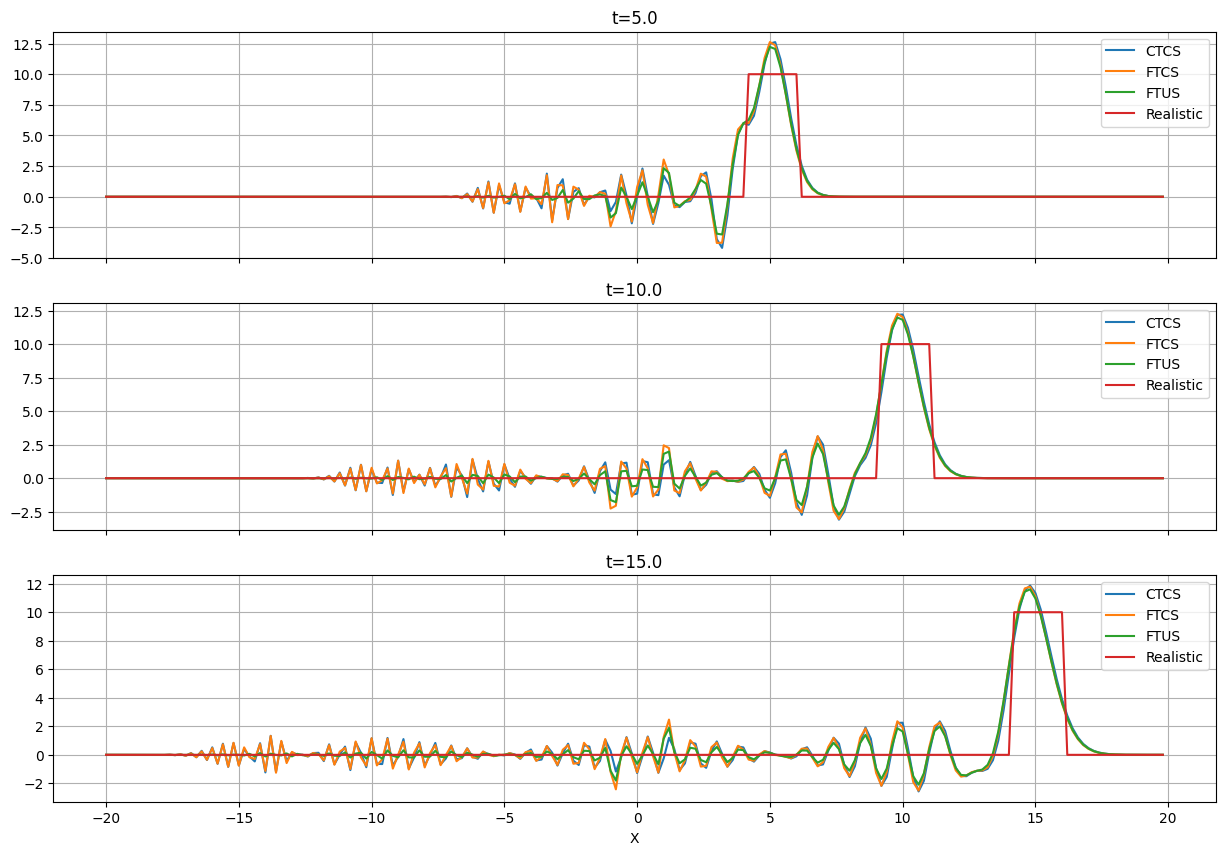

In [14]:
for i in range(len(tspace)):
    if tspace[i] == 5:
        t5 = i
    if tspace[i] == 10:
        t10 = i
    if tspace[i] == 15:
        t15 = i
tpoint = [t5, t10, t15]

fig, ax = plt.subplots(3, 1, figsize=(15,10), sharex=True)

for i in range(3):
    ax[i].set_title(r't=' + str(tspace[tpoint[i]]))
    ax[i].plot(xs, C[:, tpoint[i]], label='CTCS')
    ax[i].plot(xs, C_FTCS[:, tpoint[i]], label='FTCS')
    ax[i].plot(xs, C_FTUS[:, tpoint[i]], label='FTUS')
    ax[i].plot(xs, C_real[:, tpoint[i]], label='Realistic')
    ax[i].grid(True)
    ax[i].legend()
ax[2].set_xlabel('X')

Compare to the previous part, the fluctuations seems to be smaller and more controlled. All schemes peaks are close to the square peak of realistic.

Same code as above but change dt to 0.5 to plot.

Text(0.5, 0, 'X')

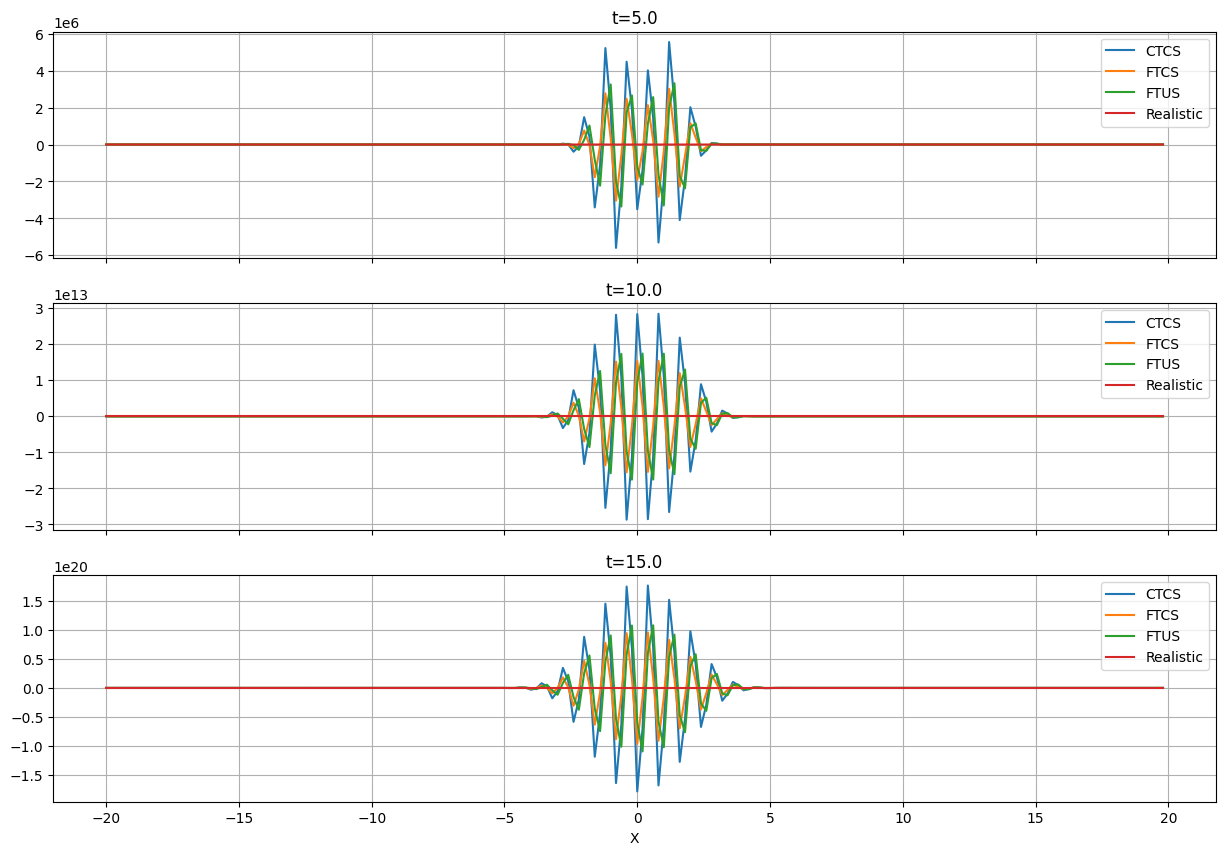

In [15]:
dx = 0.2 
dt = 0.5
u = 1  
tspace = np.arange(0, 16, dt)  
xs = np.arange(-20, 20, dx) 

C = np.zeros((len(xs), len(tspace)))
C_real = np.zeros((len(xs), len(tspace)))
C_FTCS = np.zeros((len(xs), len(tspace)))
C_FTUS = np.zeros((len(xs), len(tspace)))

for i in range(len(xs)):
    if xs[i] <= 1 and xs[i] >= -1:
        C[i, 0] = 10
        C_FTCS[i, 0] = 10
    else:
        C[i, 0] = 0
        C_FTCS[i, 0] = 0

# CTCS
for m in range(1, len(xs) - 1):
    C[m,1]=C[m,0]-u*dt/(2*dx)*(C[m+1,0]-C[m-1,0])

for n in range(1, len(tspace) - 1):
    for m in range(1, len(xs) - 1):
        C[m,n+1]=C[m,n-1]-u*dt/dx*(C[m+1,n]-C[m-1,n])

# FTCS
for n in range(0, len(tspace) - 1):
    for m in range(1, len(xs) - 1):
        C_FTCS[m,n+1]=C_FTCS[m,n]-u*dt/(2*dx)*(C[m+1,n]-C[m-1,n])

# FTUS
for n in range(0, len(tspace) - 1):
    for m in range(1, len(xs) - 1):
        C_FTUS[m,n+1]=C_FTCS[m,n]-u*dt/(dx)*(C[m,n]-C[m-1,n])

# Realistic 
for j in range(len(tspace)):
    for i in range(len(xs)):
        if xs[i] >= -1 + u * tspace[j] and xs[i] <= 1 + u * tspace[j]:
            C_real[i, j] = 10
        else:
            C_real[i, j] = 0

for i in range(len(tspace)):
    if tspace[i] == 5:
        t5 = i
    if tspace[i] == 10:
        t10 = i
    if tspace[i] == 15:
        t15 = i
tpoint = [t5, t10, t15]

fig, ax = plt.subplots(3, 1, figsize=(15,10), sharex=True)

for i in range(3):
    ax[i].set_title(r't=' + str(tspace[tpoint[i]]))
    ax[i].plot(xs, C[:, tpoint[i]], label='CTCS')
    ax[i].plot(xs, C_FTCS[:, tpoint[i]], label='FTCS')
    ax[i].plot(xs, C_FTUS[:, tpoint[i]], label='FTUS')
    ax[i].plot(xs, C_real[:, tpoint[i]], label='Realistic')
    ax[i].grid(True)
    ax[i].legend()
ax[2].set_xlabel('X')

When change dt to 0.5, the CFL condition was greater than 1, so the scheme is diverge and don’t show the peak as previous. The higher t is, the more extreme the oscillations are. In all three plots, CTCS curve is the most unstable one, while CTCS and FTUS are more stable although not correct.